In [1]:
import pandas as pd
df = pd.read_csv("df_combine.csv")

# <h1>EDA-ACF 以及 PACF</h1>

In [2]:
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf
import matplotlib.pyplot as plt

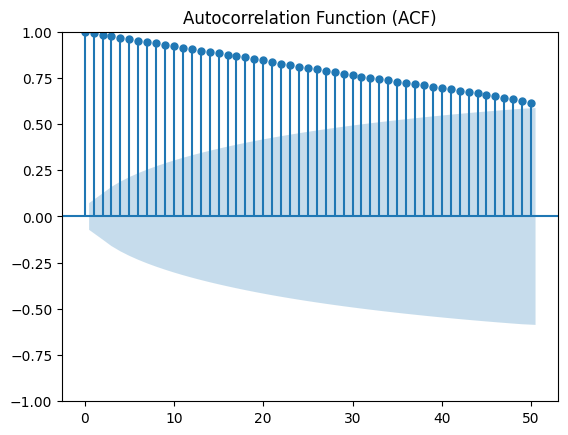

In [3]:
#計算ACF
plot_acf(df['close'], lags=50)
plt.title('Autocorrelation Function (ACF)')
plt.show()

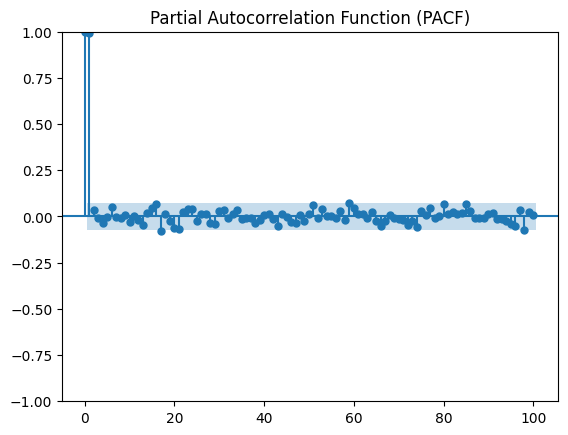

In [4]:
#計算PACF
plot_pacf(df['close'], lags=100)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller
# 檢查原始數列是否平穩
result = adfuller(df['close'])
print('ADF 檢定 p-value:', result[1])
##檢定結果pvalue>=0.05   且ACF下降很慢   表示此數列為非平穩數列  有季節性跟趨勢性

ADF 檢定 p-value: 0.5625027681389074


## 差分並再進行一次檢查

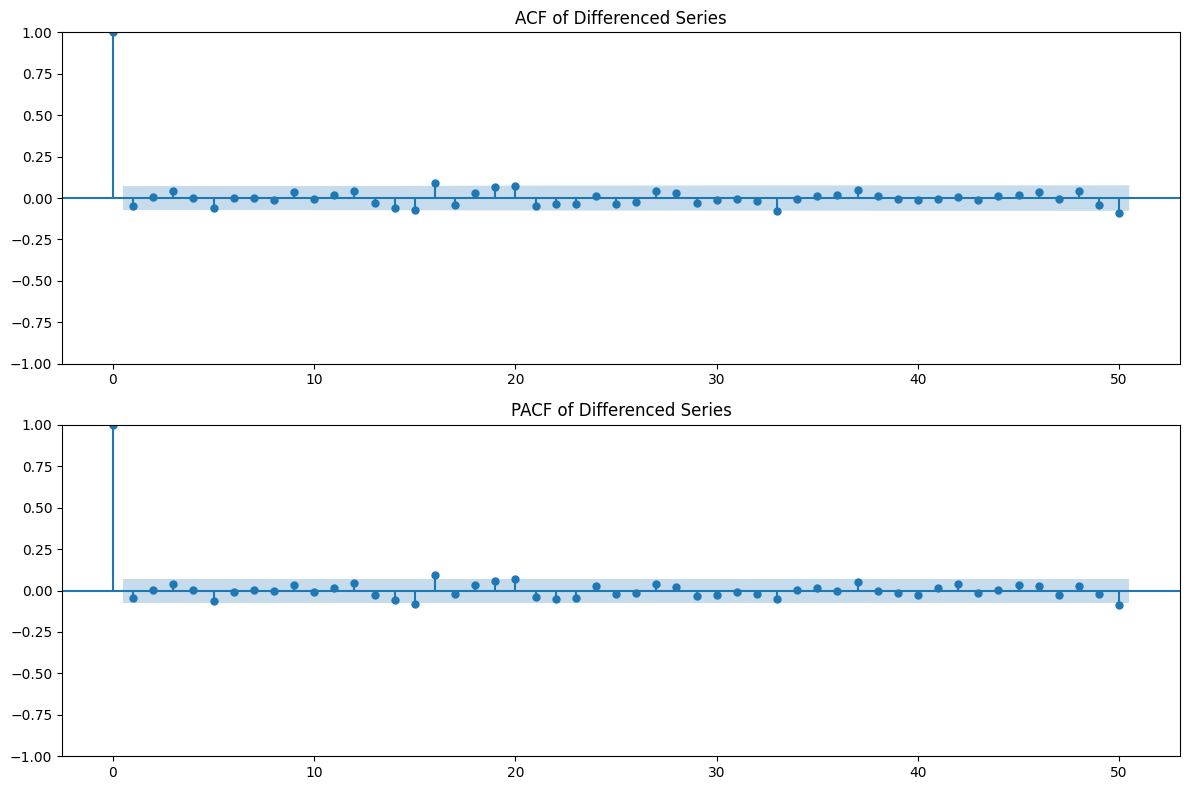

ADF Statistic (Differenced): -28.39910787728141
ADF 檢定 p-value: 0.0


In [8]:
y_diff = df["close"].diff().dropna()

# 繪製差分後數列的 ACF 和 PACF 圖
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(y_diff, lags=50, ax=axes[0], title='ACF of Differenced Series')
plot_pacf(y_diff, lags=50, ax=axes[1], title='PACF of Differenced Series')
plt.tight_layout()
plt.show()

# 再次檢查差分後數列是否平穩
result_diff = adfuller(y_diff)
print('ADF Statistic (Differenced):', result_diff[0])
print('ADF 檢定 p-value:', result_diff[1])